# **Importing Libraries**

In [222]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import os

# **Image Modularization**

In [228]:
def load_imgs(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64,64))
        images.append(img)
    return images

images = load_imgs("C:/Users/kanke/OneDrive/Desktop/images")

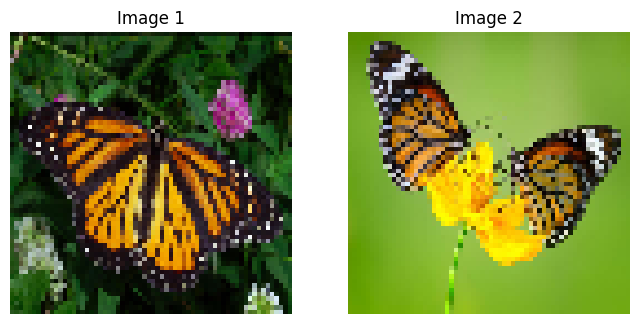

In [235]:
fig, axes = plt.subplots(1, 2, figsize=(8,6))

# Plot resized images in subplots
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(f'Image {i+1}')
    ax.axis('off')
plt.show()

In [ ]:
def kmeans_clustering(image, k):
    image = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(image)
    clusters = clusters.reshape(64, 64)
    return clusters

# **Ratio-Cut Clustering**

In [213]:
def laplacian(I, lambda_v = 0, sigma = 2):
    I = I.reshape(-1, 3)
    n = len(I)
    d = np.zeros((n, n))
    d_position = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            d[i, j] = np.linalg.norm(I[i] - I[j])
    spatial_coords = np.indices(I.shape[:2]).reshape(2, -1).T
    for i in range(n):
        for j in range(n):
            d_position[i, j] = np.linalg.norm(spatial_coords[i] - spatial_coords[j])
    d = d + lambda_v*d_position
    s = np.exp(-d/(2*sigma**2))
    D = np.diag(np.sum(s, axis=1))
    L = D - s
    return L

In [215]:
def spectral(L, k):
    eigvals, eigvecs = np.linalg.eigh(L)
    indices = np.argsort(eigvals)[:k]
    H = eigvecs[:, indices]
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(H)
    clusters = clusters.reshape(64, 64)
    return clusters

After calculating eigen values and eigen vector, sort the eigen values in ascending order and return those indices.
Then select the first k smallest eigen values and then select the columns of their eigen vectors.

# **k=3**

c:\Users\kanke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kanke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


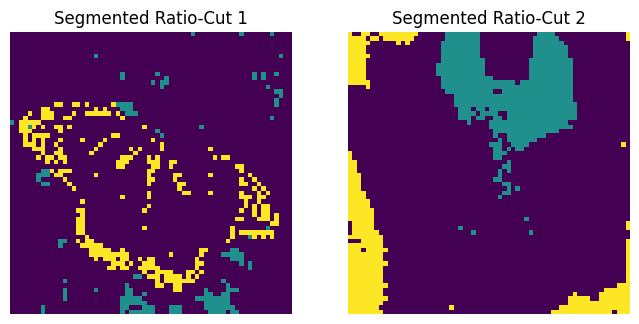

In [278]:
laplacian_I = [laplacian(I, sigma=1.7) for I in images]
segmented_I = [spectral(I, k=3) for I in laplacian_I]

fig, axes = plt.subplots(1, 2, figsize=(8,6))

# Plot resized images in subplots
for i, ax in enumerate(axes):
    ax.imshow(segmented_I[i])
    ax.set_title(f'Segmented Ratio-Cut {i+1}')
    ax.axis('off')
plt.show()

In [158]:
I1 = cv2.imread("image1.jpg")
I2 = cv2.imread("image2.jpg")
I1 = cv2.cvtColor(I1, cv2.COLOR_BGR2RGB)
I2 = cv2.cvtColor(I2, cv2.COLOR_BGR2RGB)
I1 = cv2.resize(I1, (64, 64))
I2 = cv2.resize(I2, (64, 64))

# **k=6**

c:\Users\kanke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


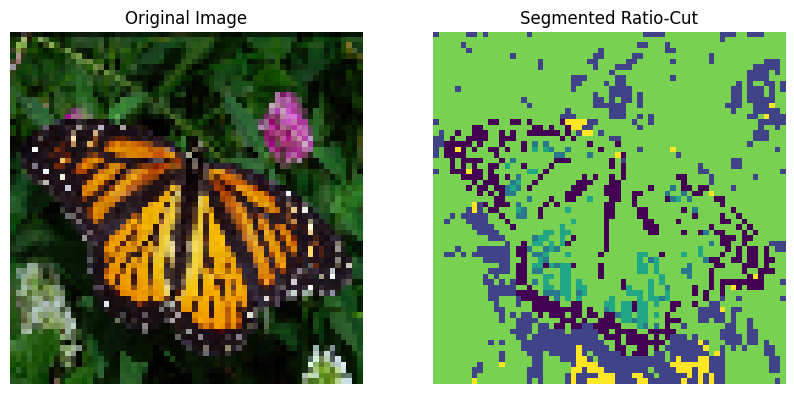

In [276]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(I1)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
n1 = laplacian(I1,2)
n1 = spectral(n1, 6)
plt.imshow(n1)
plt.title('Segmented Ratio-Cut')
plt.axis('off')

plt.show()

c:\Users\kanke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


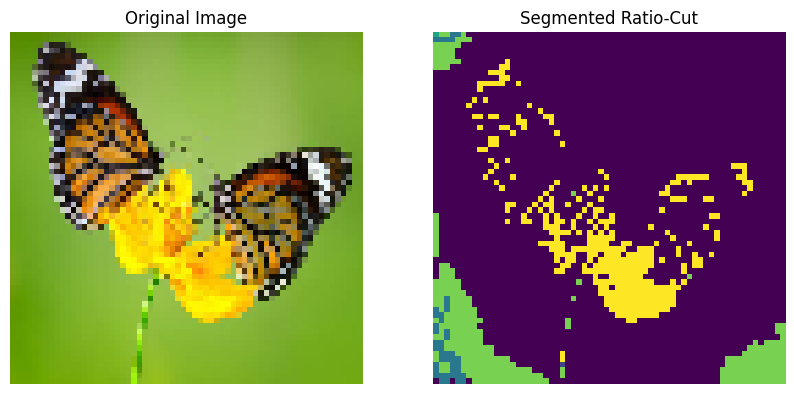

In [277]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(I2)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
n2 = laplacian(I2, sigma=5)
n2 = spectral(n2, 6)
plt.imshow(n2)
plt.title('Segmented Ratio-Cut')
plt.axis('off')

plt.show()

# **K-Means Clustering**

c:\Users\kanke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kanke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


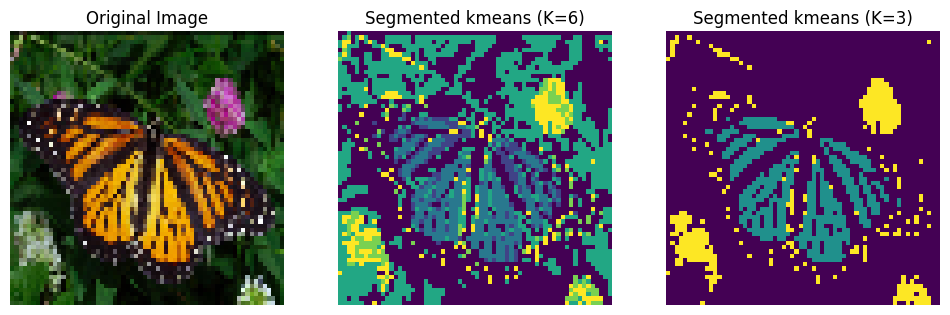

c:\Users\kanke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kanke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


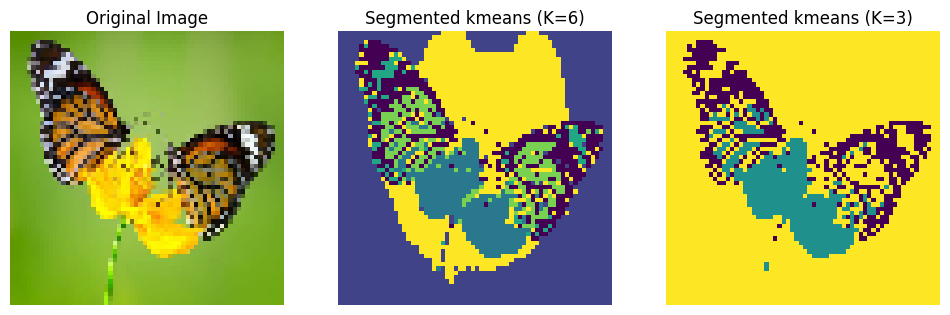

In [274]:
folder_path = "C:/Users/kanke/OneDrive/Desktop/images"
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64,64))
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(131)
    plt.imshow(image)
    plt.title(f'Original Image')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(kmeans_clustering(image, 6))
    plt.title('Segmented kmeans (K=6)')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(kmeans_clustering(image, 3))
    plt.title('Segmented kmeans (K=3)')
    plt.axis('off')

    plt.show()
